캐글 신용카드 거래내용이 포함된 데이터 셋을 아래 사이트에서 다운받아 다음 사항을 수행하세요.

https://www.kaggle.com/mlg-ulb/creditcardfraud

데이터 설명
데이터 세트에는 유럽 카드 소지자가 2013년 9월에 신용 카드로 거래한 내용이 포함되어 있습니다. 이 데이터 세트는 284,807건의 거래 중 492건의 사기가 발생한 이틀 동안 발생한 거래를 보여줍니다. 데이터 세트는 매우 불균형하며 긍정적 클래스(사기)는 모든 거래의 0.172%를 차지합니다.

여기에는 PCA 변환의 결과인 숫자 입력 변수만 포함됩니다. 안타깝게도 기밀 문제로 인해 데이터에 대한 원래 기능과 추가 배경 정보를 제공할 수 없습니다. 기능 V1, V2, … V28은 PCA로 얻은 주요 구성 요소이며 PCA로 변환되지 않은 유일한 기능은 '시간'과 '양'입니다. 기능 '시간'에는 각 트랜잭션과 데이터 세트의 첫 번째 트랜잭션 사이에 경과된 초가 포함됩니다. 'Amount' 기능은 거래 금액이며, 이 기능은 예제 종속 비용에 민감한 학습에 사용할 수 있습니다. 기능 'Class'는 응답 변수이며 사기의 경우 값 1, 그렇지 않은 경우 0을 취합니다.

데이터 전처리 후 로지스틱 리그레션을 적용한 모델 학습 및 평가(정확도, 정밀도, 재현율, F1 score, AUC)
Amount 피처를 정규분포 및 로그 변환 후 모델 학습 및 평가
상관성이 높은 피처 한개를 선택하여 이상치 데이터 제거 후 모델 학습 및 평가
SMOTE 오버 샘플링 적용 후 모델 학습 및 평가
SMOTE 적용 시 인사이트 요약

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred) # 오차행렬
    accuracy = accuracy_score(y_test, pred) # 정확도
    precision = precision_score(y_test, pred) # 정밀도
    recall = recall_score(y_test, pred) # 재현율
    f1 = f1_score(y_test, pred) # f1 score
    roc = roc_auc_score(y_test, pred_proba)

    print(f'오차행렬 : \n{confusion}\n\nTN = {confusion[0, 0]}, FP = {confusion[0, 1]}\nFN = {confusion[1, 0]}, TP = {confusion[1, 1]}\n')
    print(f'정확도 : {round(accuracy, 4)} \n정밀도 : {round(precision, 4)} \n재현율 : {round(recall, 4)} \nF1 score : {round(f1, 4)} \nAUC : {round(roc, 4)}')


In [1]:
!pip install imbalanced-learn

In [3]:
import pandas as pd
card_df=pd.read_csv('./dataset/creditcard.csv')
card_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
card_df.Class.unique()

array([0, 1], dtype=int64)

In [5]:
from sklearn.model_selection import train_test_split
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [6]:
def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [7]:
#오버샘플링 하기전 데이터 상태보기
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [8]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차행렬 : 
[[85282    13]
 [   59    89]]

TN = 85282, FP = 13
FN = 59, TP = 89

정확도 : 0.9992 
정밀도 : 0.8725 
재현율 : 0.6014 
F1 score : 0.712 
AUC : 0.9568


C:\Users\qkrrh\anaconda3\envs\cakd5\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [11]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차행렬 : 
[[85290     5]
 [   36   112]]

TN = 85290, FP = 5
FN = 36, TP = 112

정확도 : 0.9995 
정밀도 : 0.9573 
재현율 : 0.7568 
F1 score : 0.8453 
AUC : 0.979


C:\Users\qkrrh\anaconda3\envs\cakd5\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Amount', ylabel='Density'>

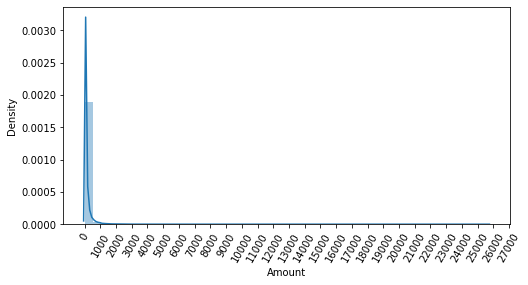

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

In [13]:
from sklearn.preprocessing import StandardScaler
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

In [14]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('로지스틱 회귀 예측')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('LightGBM 예측')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

로지스틱 회귀 예측
오차행렬 : 
[[85281    14]
 [   58    90]]

TN = 85281, FP = 14
FN = 58, TP = 90

정확도 : 0.9992 
정밀도 : 0.8654 
재현율 : 0.6081 
F1 score : 0.7143 
AUC : 0.9702
LightGBM 예측
오차행렬 : 
[[85290     5]
 [   37   111]]

TN = 85290, FP = 5
FN = 37, TP = 111

정확도 : 0.9995 
정밀도 : 0.9569 
재현율 : 0.75 
F1 score : 0.8409 
AUC : 0.9779


In [15]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

In [16]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('로지스틱 회귀 예측')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('LightGBM 예측')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

로지스틱 회귀 예측
오차행렬 : 
[[85283    12]
 [   59    89]]

TN = 85283, FP = 12
FN = 59, TP = 89

정확도 : 0.9992 
정밀도 : 0.8812 
재현율 : 0.6014 
F1 score : 0.7149 
AUC : 0.9727
LightGBM 예측
오차행렬 : 
[[85290     5]
 [   35   113]]

TN = 85290, FP = 5
FN = 35, TP = 113

정확도 : 0.9995 
정밀도 : 0.9576 
재현율 : 0.7635 
F1 score : 0.8496 
AUC : 0.9796


<AxesSubplot:>

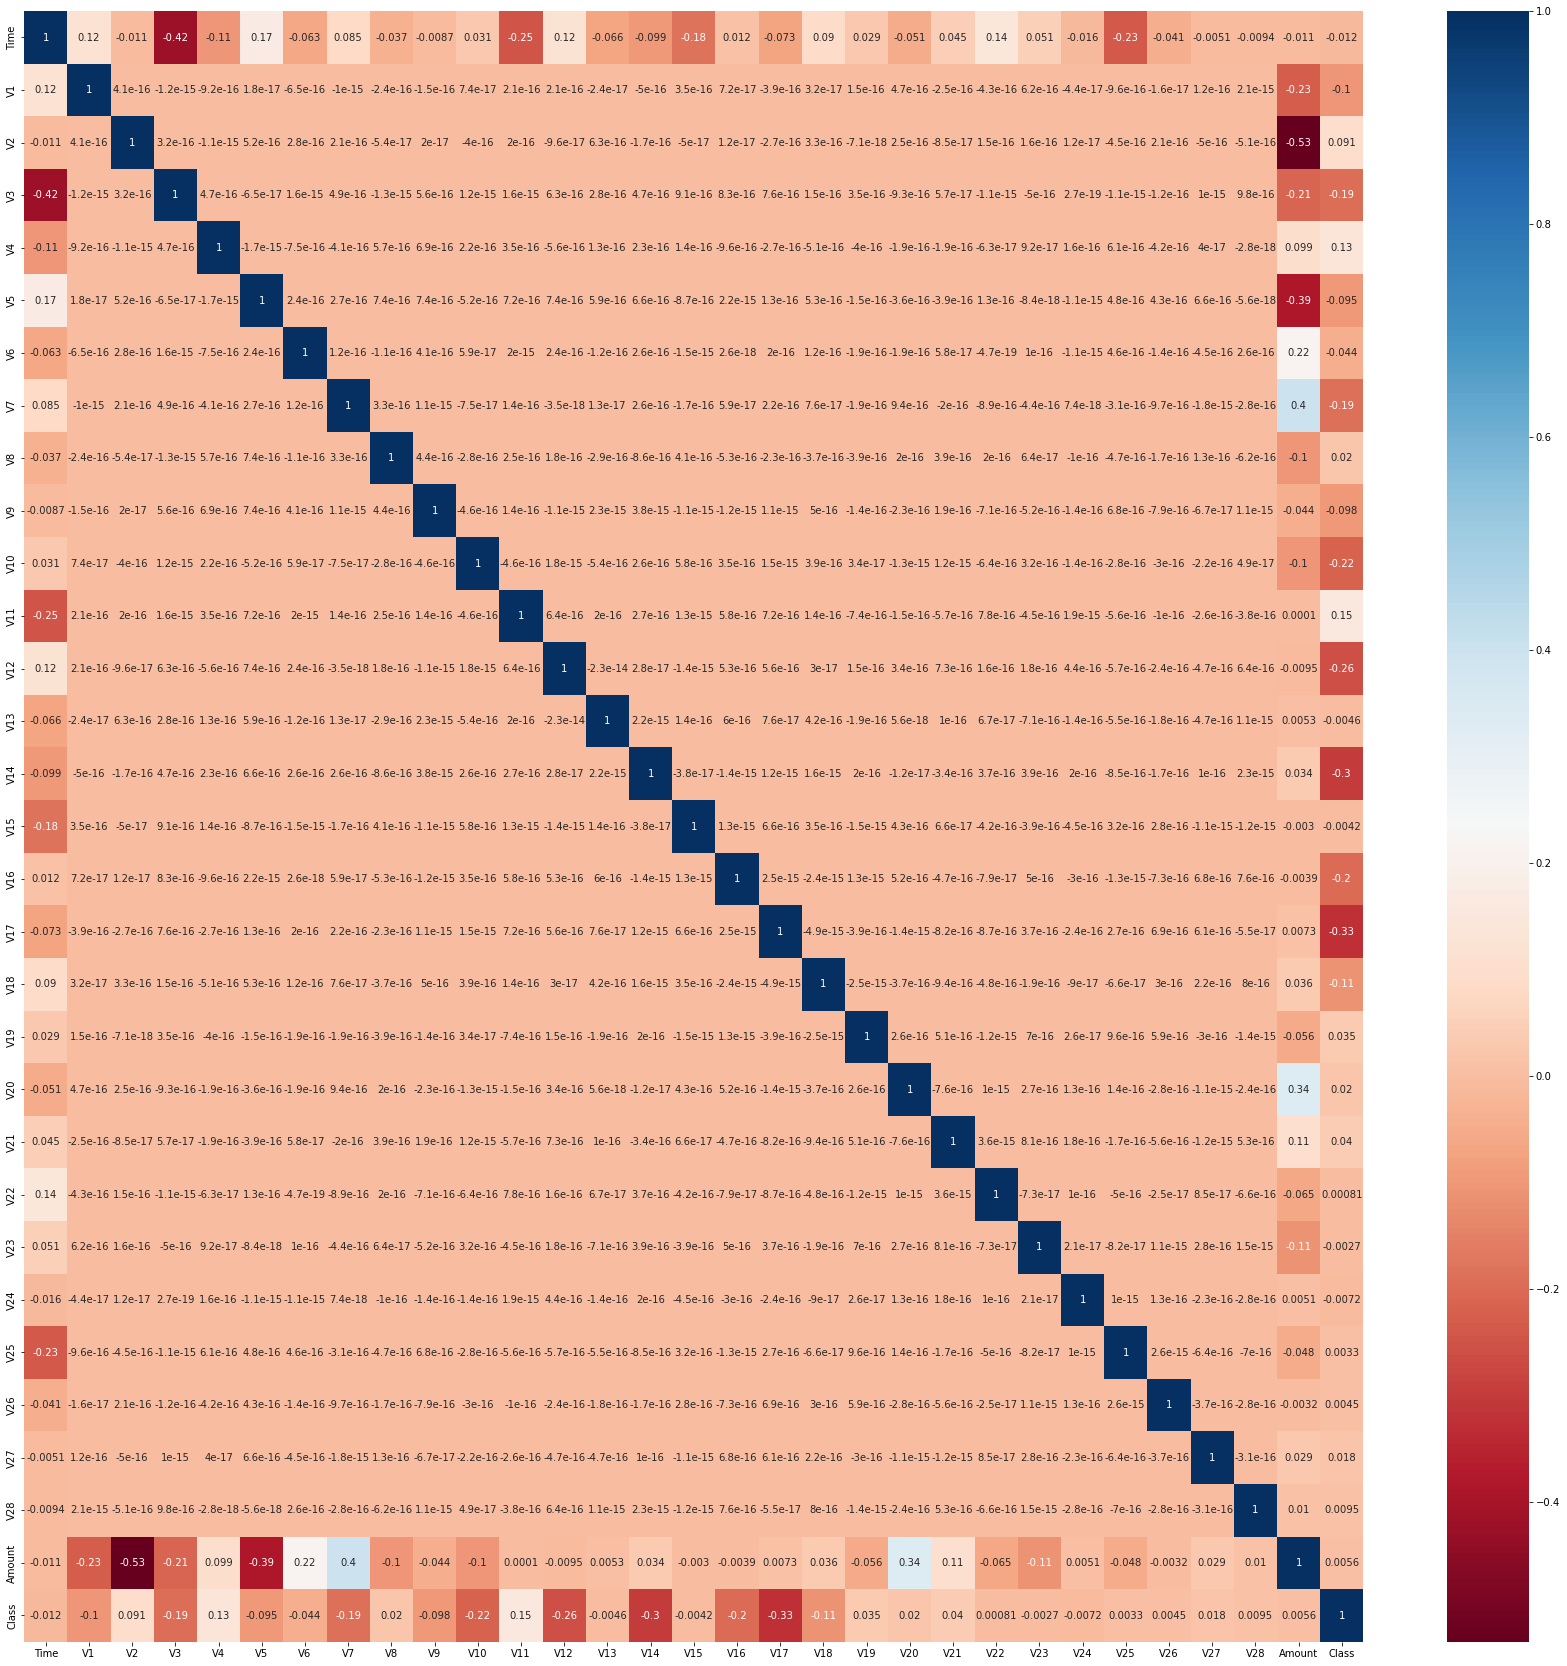

In [17]:
plt.figure(figsize=(30, 30))
sns.heatmap(card_df.corr(), cmap='RdBu', annot=True)

In [18]:
def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df['Class'] == 1][column]
    q25 = np.percentile(fraud.values, 25)
    q75 = np.percentile(fraud.values, 75)
    iqr = q75 - q25
    iqr_weight = iqr * weight
    low_val = q25 - iqr_weight
    high_val = q75 + iqr_weight
    outlier_index = fraud[(fraud < low_val) | (fraud > high_val)].index
    return outlier_index

In [19]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print(f'이상치 데이터: {outlier_index}')

이상치 데이터: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [20]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

In [21]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('로지스틱 회귀 예측')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('\nLightGBM 예측')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

로지스틱 회귀 예측
오차행렬 : 
[[85281    14]
 [   48    98]]

TN = 85281, FP = 14
FN = 48, TP = 98

정확도 : 0.9993 
정밀도 : 0.875 
재현율 : 0.6712 
F1 score : 0.7597 
AUC : 0.9743

LightGBM 예측
오차행렬 : 
[[85290     5]
 [   25   121]]

TN = 85290, FP = 5
FN = 25, TP = 121

정확도 : 0.9996 
정밀도 : 0.9603 
재현율 : 0.8288 
F1 score : 0.8897 
AUC : 0.978


In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print(f'SMOTE 적용 전 학습용 피처/레이블 데이터 세트: {X_train.shape, y_train.shape}')
print(f'SMOTE 적용 후 학습용 피처/레이블 데이터 세트: {X_train_over.shape, y_train_over.shape}')
print(f'SMOTE 적용 후 레이블 값 분포: \n{pd.Series(y_train_over).value_counts()}')

SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ((199362, 29), (199362,))
SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ((398040, 29), (398040,))
SMOTE 적용 후 레이블 값 분포: 
0    199020
1    199020
Name: Class, dtype: int64


In [25]:
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차행렬 : 
[[82937  2358]
 [   11   135]]

TN = 82937, FP = 2358
FN = 11, TP = 135

정확도 : 0.9723 
정밀도 : 0.0542 
재현율 : 0.9247 
F1 score : 0.1023 
AUC : 0.9737


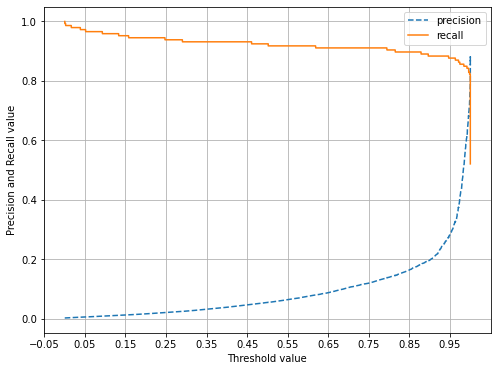

In [26]:
from sklearn.metrics import precision_recall_curve
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

In [27]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차행렬 : 
[[85283    12]
 [   22   124]]

TN = 85283, FP = 12
FN = 22, TP = 124

정확도 : 0.9996 
정밀도 : 0.9118 
재현율 : 0.8493 
F1 score : 0.8794 
AUC : 0.9814


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

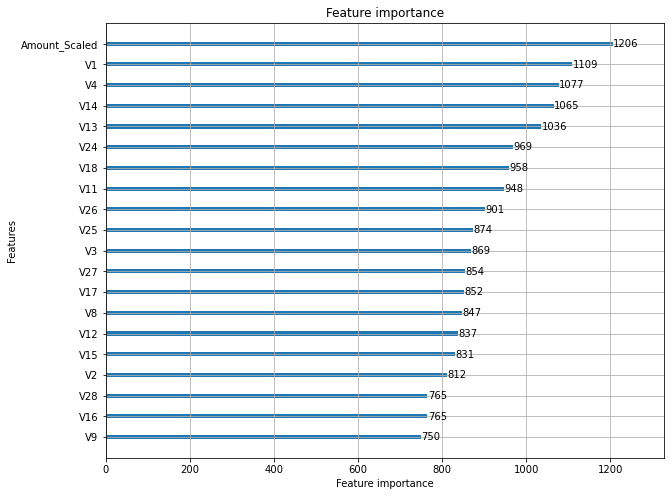

In [28]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(lgbm_clf,ax=ax,max_num_features=20)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

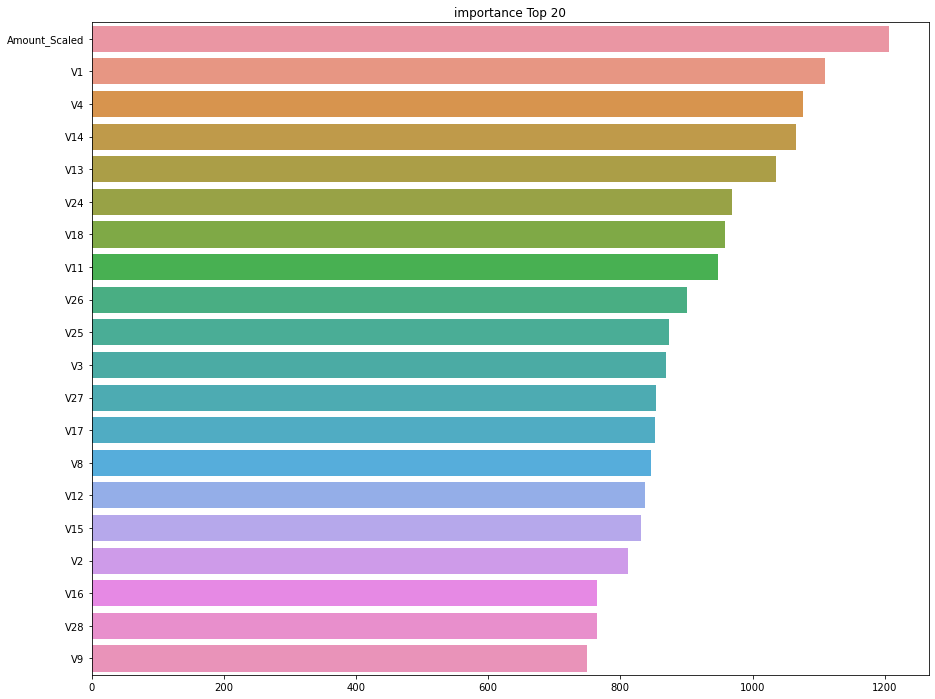

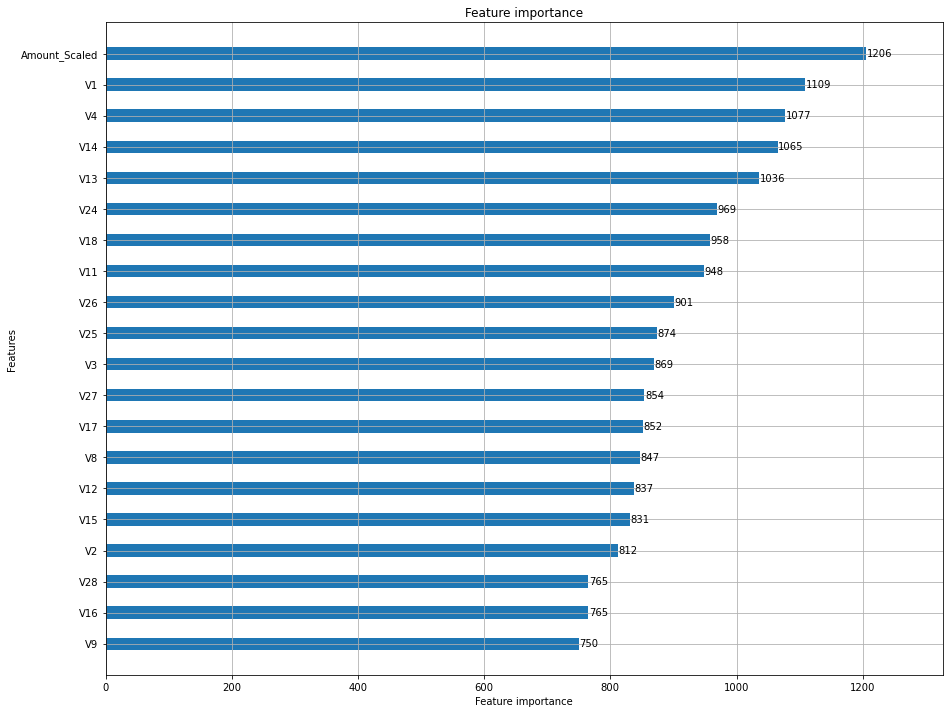

In [34]:
importances = pd.Series(lgbm_clf.feature_importances_, index = X_train.columns)
importances_top20 = importances.sort_values(ascending = False)[:20]

plt.figure(figsize = (15, 12))
plt.title('importance Top 20')
sns.barplot(x = importances_top20, y = importances_top20.index)


fig, ax = plt.subplots(1, 1, figsize = (15, 12))
plot_importance(lgbm_clf, ax = ax, max_num_features = 20, height = 0.4)


SMOTE를 적용하면 재현율은 높아지나 정밀도는 낮아지는 것이 일반적이며, 좋은 SMOTH패키지 일수록 재현율은 개선하고 정밀도 감소율은 낮출 수 있도록 데이터를 증식한다.